In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# dust 초기 세팅

file_path='dust.xlsx'
dust=pd.read_excel(file_path)

dust.rename(columns={'날짜':'date','아황산가스':'so2',
                    '일산화탄소':'co','오존':'o3',
                    '이산화질소':'no2'},inplace=True)
dust['date']=dust['date'].str[:11]
dust['date']=pd.to_datetime(dust['date'])
dust['year']=dust['date'].dt.year
dust['month']=dust['date'].dt.month
dust['day']=dust['date'].dt.day
dust=dust[['date','year','month','day','so2','co','o3','no2','PM10','PM2.5']]
dust['month']=dust['month'].astype(int)
dust['day']=dust['day'].astype(int)
# dust=dust.fillna(method='pad')
# dust.fillna(20,inplace=True)

In [6]:
# 연습2
dust=dust.fillna(method='bfill')
dust.head()

C:\Users\qoi11\AppData\Local\Temp\ipykernel_27792\2389830531.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust=dust.fillna(method='bfill')


,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,20.0,14.0


In [7]:
# 날씨 데이터 세팅

file_path='weather.xlsx'
weather=pd.read_excel(file_path)
weather.drop('지점',axis=1,inplace=True)
weather.drop('지점명',axis=1,inplace=True)
weather.columns=['date','temp','wind','rain','humid']
weather['date'] = pd.to_datetime(weather['date']).dt.date
weather['date']=pd.to_datetime(weather['date'])
weather['rain']=weather['rain'].replace([0], 0.01)
df=pd.merge(dust,weather,on='date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.01,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.01,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.01,62.0
3,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.1,0.5,0.01,60.5
4,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.7,1.3,0.01,66.4


C:\Users\qoi11\AppData\Local\Temp\ipykernel_27792\1710060001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='o3', data=df, palette='Set1')


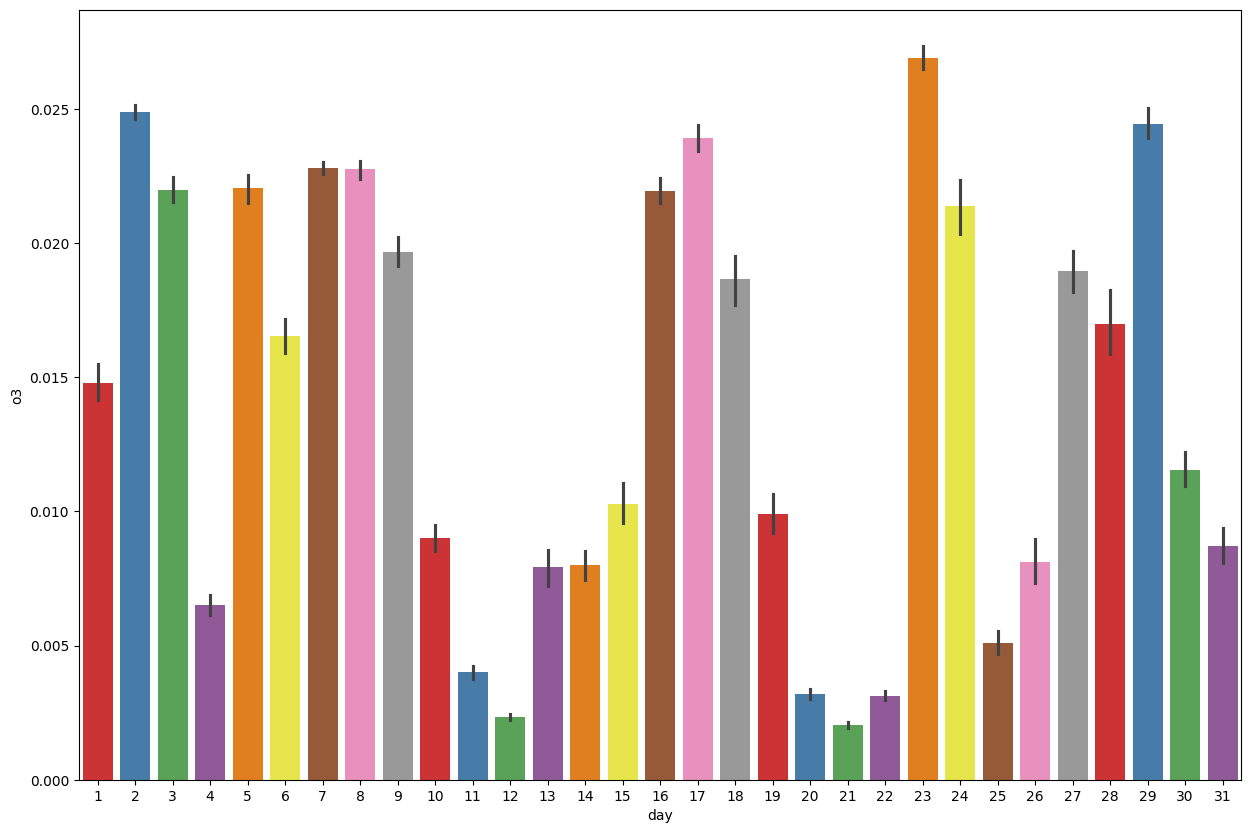

In [8]:
# 연습3
plt.figure(figsize=(15,10))
sns.barplot(x='day', y='o3', data=df, palette='Set1')
plt.show()

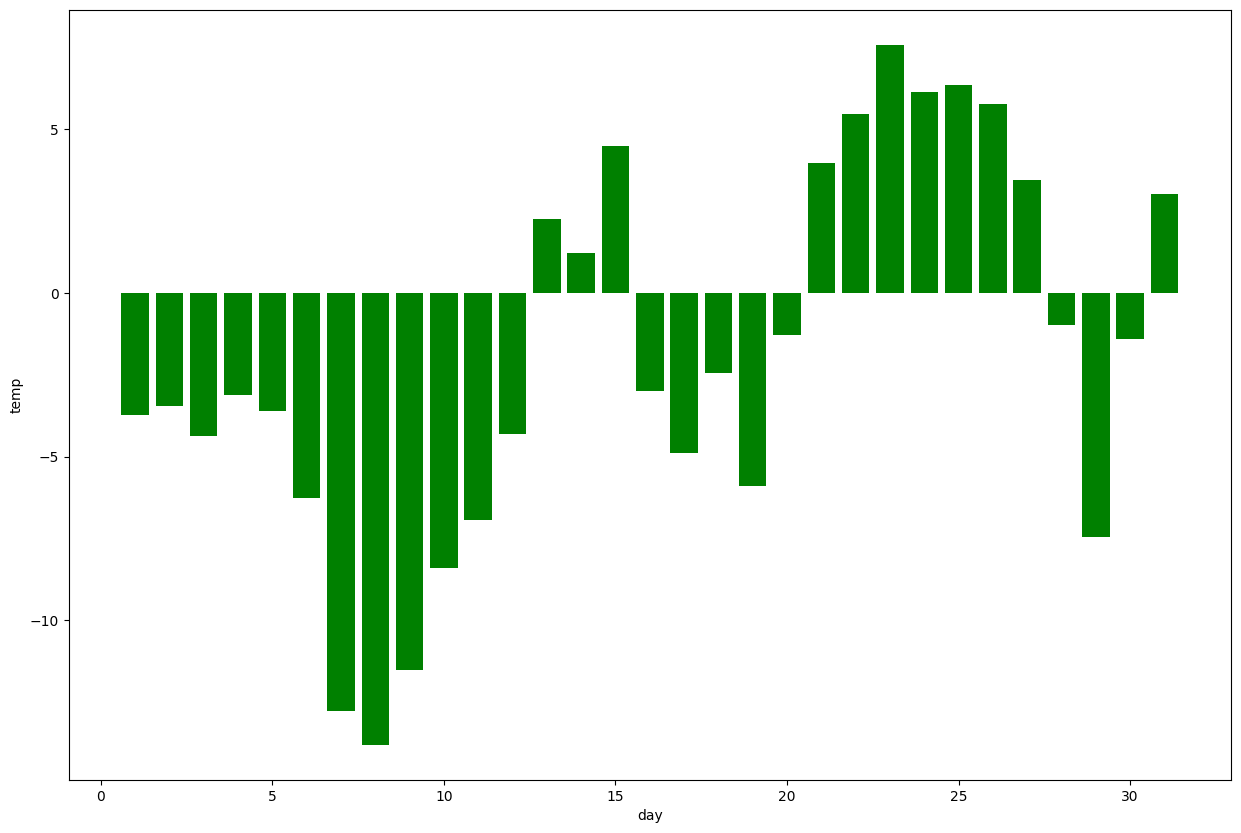

In [9]:
# 연습4
plt.figure(figsize=(15,10))

avg = df.groupby('day')['temp'].mean()
x = pd.DataFrame(avg)
plt.bar(x.index, avg, color='g')
plt.xlabel('day')
plt.ylabel('temp')
plt.show()